In [1]:
import sys
sys.path.insert(0, '../')
import config as cf
import pandas as pd
from collections import Counter
import ast

### Load US-reopen-emotion Data:

In [2]:
df_emos = pd.read_csv(cf.US_REOPEN_EMOTION)
print("Shape = ", df_emos.shape)
df_emos.info()

Shape =  (9957, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 11 columns):
id                   9957 non-null int64
created_at           9957 non-null object
original_text        9957 non-null object
clean_text           9957 non-null object
sentiment            9957 non-null object
lang                 9957 non-null object
screen_name          9957 non-null object
location             9957 non-null object
tone_format_tweet    9957 non-null object
emotions             9957 non-null object
key_tones            9957 non-null object
dtypes: int64(1), object(10)
memory usage: 855.8+ KB


### Get Key Time from Date:

In [3]:
from datetime import datetime

def get_key_time(x):
    t = datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y')
    return t.day

df_emos["key_time"] = df_emos["created_at"].apply(get_key_time)
print("Shape = ", df_emos.shape)
df_emos.info()

Shape =  (9957, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 12 columns):
id                   9957 non-null int64
created_at           9957 non-null object
original_text        9957 non-null object
clean_text           9957 non-null object
sentiment            9957 non-null object
lang                 9957 non-null object
screen_name          9957 non-null object
location             9957 non-null object
tone_format_tweet    9957 non-null object
emotions             9957 non-null object
key_tones            9957 non-null object
key_time             9957 non-null int64
dtypes: int64(2), object(10)
memory usage: 933.5+ KB


### Flat Emotions by Time:

In [3]:
emo_times = []
all_times = list(set(list(df_emos["key_time"])))
for ktime in all_times:
    df_time = df_emos[df_emos["key_time"] == ktime]
    emos_group = df_time["key_tones"].tolist()
    emos_group = [ast.literal_eval(emos) for emos in emos_group]
    emos_flat  = [emo for emos_sub in emos_group for emo in emos_sub]
    emos_dict = dict(Counter(emos_flat))
    sum_vals = sum(emos_dict.values())
    for kemo, vcount in emos_dict.items():
        emo_times.append([ktime, kemo, round(vcount/sum_vals*100, 2)])
print(emo_times)

[[3, 'Analytical', 30.61], [3, 'Confident', 7.18], [3, 'Tentative', 15.62], [3, 'Joy', 14.44], [3, 'Fear', 2.27], [3, 'Sadness', 27.97], [3, 'Anger', 1.91], [4, 'Tentative', 23.66], [4, 'Analytical', 32.36], [4, 'Sadness', 22.87], [4, 'Joy', 12.53], [4, 'Confident', 6.55], [4, 'Anger', 1.18], [4, 'Fear', 0.84], [5, 'Fear', 1.4], [5, 'Joy', 25.97], [5, 'Tentative', 24.35], [5, 'Analytical', 27.73], [5, 'Confident', 8.19], [5, 'Sadness', 11.04], [5, 'Anger', 1.31], [6, 'Joy', 22.46], [6, 'Fear', 2.58], [6, 'Analytical', 35.07], [6, 'Tentative', 20.69], [6, 'Sadness', 8.55], [6, 'Anger', 1.77], [6, 'Confident', 8.89], [7, 'Joy', 16.86], [7, 'Analytical', 40.83], [7, 'Tentative', 16.54], [7, 'Sadness', 11.28], [7, 'Fear', 1.29], [7, 'Confident', 11.67], [7, 'Anger', 1.53], [9, 'Sadness', 13.56], [9, 'Tentative', 14.59], [9, 'Analytical', 38.97], [9, 'Anger', 1.35], [9, 'Confident', 8.56], [9, 'Joy', 21.74], [9, 'Fear', 1.24], [10, 'Confident', 10.1], [10, 'Anger', 4.53], [10, 'Fear', 3.39]

### Draw Time Plot:

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


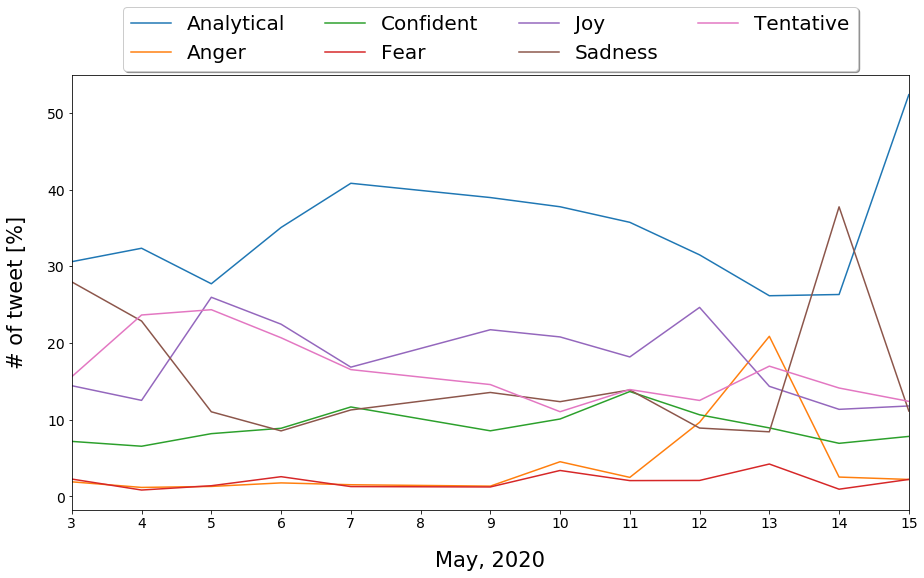

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(emo_times, columns=['Date', 'Emotion', 'Tweet'])
df = df.pivot(index='Date', columns='Emotion', values='Tweet')
df.plot()
plt.xticks(np.arange(all_times[0], all_times[-1]+1, 1))
ax = plt.subplot(111)
ax.legend(loc='upper center', prop={'size': 20}, bbox_to_anchor=(0.5, 1.18), ncol=4, fancybox=True, shadow=True)
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel("May, 2020",fontsize=21,labelpad=20)
ax.set_ylabel("# of tweet [%]",fontsize=21,labelpad=20)
fig.savefig('figs/tone_perc_time.png', dpi=400)